<a href="https://colab.research.google.com/github/jleacock2020/CourseraDataAnalystWork/blob/main/Modelling%2C%20fitting%2C%20training%2C%20validation%2C%20testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Evaluate Your Model**

In Machine Learning we create models to predict the outcome of certain events, like in the previous chapter where we predicted the CO2 emission of a car when we knew the weight and engine size.

To measure if the model is good enough, we can use a method called Train/Test.

**What is Train/Test**

Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the data set into two sets: a training set and a testing set.

80% for training, and 20% for testing.

You train the model using the training set.

You test the model using the testing set.

Train the model means create the model.

Test the model means test the accuracy of the model.

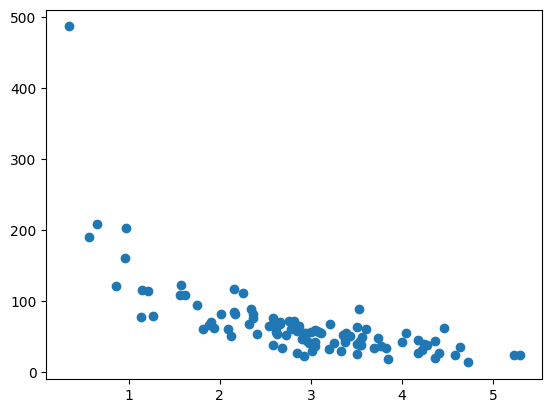

In [ ]:
# Start with a data set you want to test.

# Our data set illustrates 100 customers in a shop, and their shopping habits.


import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

# The x axis represents the number of minutes before making a purchase.

# The y axis represents the amount of money spent on the purchase.

**Split Into Train/Test**

The training set should be a random selection of 80% of the original data.

The testing set should be the remaining 20%.

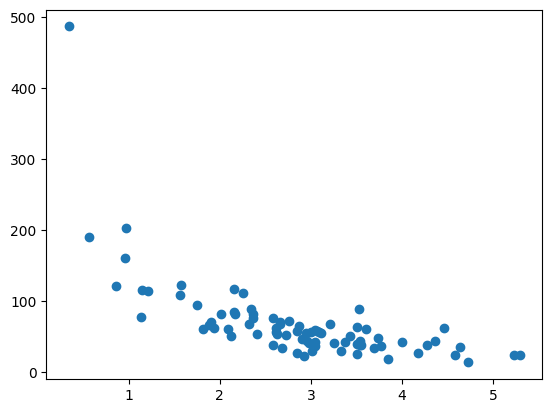

In [ ]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]
plt.scatter(train_x, train_y)
plt.show()

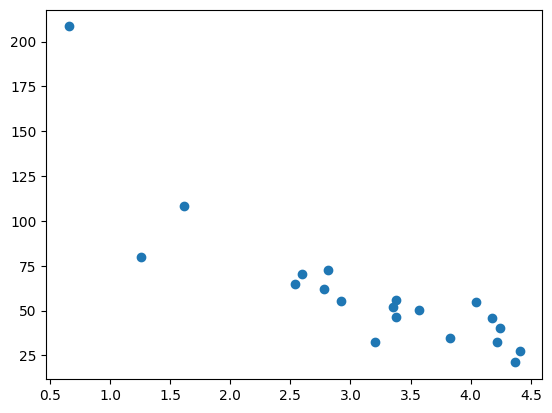

In [ ]:
plt.scatter(test_x, test_y)
plt.show()

**Fit the Data Set**

What does the data set look like? In my opinion I think the best fit would be a polynomial regression, so let us draw a line of polynomial regression.

To draw a line through the data points, we use the plot() method of the matplotlib module:

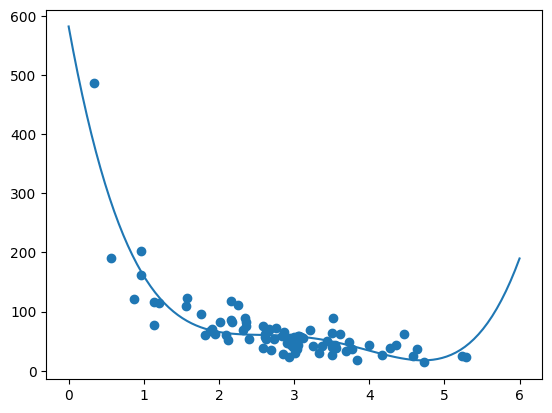

In [ ]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

The result can back my suggestion of the data set fitting a polynomial regression, even though it would give us some weird results if we try to predict values outside of the data set. Example: the line indicates that a customer spending 6 minutes in the shop would make a purchase worth 200. That is probably a sign of overfitting.

But what about the R-squared score? The R-squared score is a good indicator of how well my data set is fitting the model.

R2
**Remember R2, also known as R-squared?**

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called r2_score() that will help us find this relationship.

In this case we would like to measure the relationship between the minutes a customer stays in the shop and how much money they spend.

In [ ]:
# How well does my training data fit in a polynomial regression?
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.79886455446298


**Bring in the Testing Set**

Now we have made a model that is OK, at least when it comes to training data.

Now we want to test the model with the testing data as well, to see if gives us the same result.

In [ ]:
# Let us find the R2 score when using testing data:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343566


Note: The result 0.809 shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values.

In [ ]:
# Predict Values
# Now that we have established that our model is OK, we can start predicting new values.

# How much money will a buying customer spend, if she or he stays in the shop for 5 minutes?

print(mymodel(19))

339385.6226160842


I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data. Seems good, right? But train/test split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

As mentioned, in statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean:

Overfitting

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

Underfitting

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

When analyzing a dataset linearly, we encounter an under-fitting problem, which can be corrected using polynomial regression.

To avoid over-fitting, we can increase the number of training samples so that the algorithm does not learn the system’s noise and becomes more generalized.

Cross-Validation Techniques

we can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

Cross-validation is a technique used to evaluate the performance of a model by assessing its ability to generalize to new data. The goal of cross-validation is to ensure that a model is not overfitting to the training data, and is able to make accurate predictions on unseen data.

There are several techniques for performing cross-validation, including:

K-fold Cross-Validation: This technique involves randomly dividing the data into k “folds”, where k-1 folds are used for training and one fold is used for testing. This process is repeated k times, with a different fold used for testing each time. The final performance metric is the average of the performance of the model on each test set.

Leave-One-Out Cross-Validation:

Monte Carlo Cross-Validation:

Stratified K-fold cross-validation:

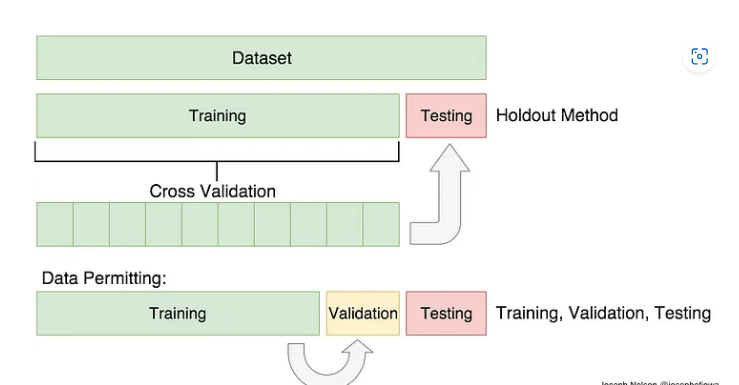